In [2]:
# importing inbuild library functions
import nltk
import textblob
import matplotlib
import re
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import seaborn as sns
import pandas as pd
import pandas as df
import matplotlib.pyplot as plt
%matplotlib inline  
matplotlib.get_backend()
df = pd.read_csv("gender-classifier-DFE-791531.csv",encoding='latin1')


In [3]:
print(df)

        _unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
0      815719226    False   finalized                   3    10/26/15 23:24   
1      815719227    False   finalized                   3    10/26/15 23:30   
2      815719228    False   finalized                   3    10/26/15 23:33   
3      815719229    False   finalized                   3    10/26/15 23:10   
4      815719230    False   finalized                   3     10/27/15 1:15   
5      815719231    False   finalized                   3     10/27/15 1:47   
6      815719232    False   finalized                   3     10/27/15 1:57   
7      815719233    False   finalized                   3    10/26/15 23:48   
8      815719234    False   finalized                   3     10/27/15 1:52   
9      815719235    False   finalized                   3     10/27/15 1:49   
10     815719236    False   finalized                   3    10/26/15 23:17   
11     815719237    False   finalized               

In [4]:
# Number of columns
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [5]:
df.head(5)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN


In [6]:
# information regarding the table
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 20050 non-null int64
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
_last_judgment_at        20000 non-null object
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
created                  20050 non-null object
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050 non-null object
name                     20050 non-null object
profile_yn_gold          50 non-null object
profileimage             20050 non-null object
retweet_count            20050 non-null int64
sidebar_color            20050 non-null object
text    

In [7]:
df.corr()

,_unit_id,_golden,_trusted_judgments,gender:confidence,profile_yn:confidence,fav_number,retweet_count,tweet_count,tweet_id
_unit_id,1.000000,0.208055,0.207651,0.007918,0.015168,0.024878,-0.004337,-0.024809,0.844887
_golden,0.208055,1.000000,0.998592,0.008818,0.005592,0.003794,-0.000744,-0.009669,-0.005985
_trusted_judgments,0.207651,0.998592,1.000000,0.009550,0.005543,0.003851,-0.000765,-0.009703,-0.005781
gender:confidence,0.007918,0.008818,0.009550,1.000000,0.313628,-0.030889,-0.004947,-0.013558,0.027901
profile_yn:confidence,0.015168,0.005592,0.005543,0.313628,1.000000,-0.003256,0.001376,-0.012665,0.019044
fav_number,0.024878,0.003794,0.003851,-0.030889,-0.003256,1.000000,0.008274,0.066733,0.041788
retweet_count,-0.004337,-0.000744,-0.000765,-0.004947,0.001376,0.008274,1.000000,-0.001263,-0.006466
tweet_count,-0.024809,-0.009669,-0.009703,-0.013558,-0.012665,0.066733,-0.001263,1.000000,-0.037836
tweet_id,0.844887,-0.005985,-0.005781,0.027901,0.019044,0.041788,-0.006466,-0.037836,1.000000


In [8]:
#gender value counts
df.gender.value_counts()


female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

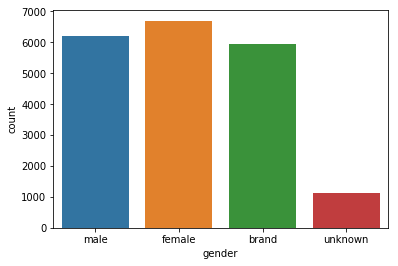

In [9]:
## visulaize gender lables 
sns.countplot(df['gender'], label = 'Gender')


In [10]:
df.dtypes

_unit_id                   int64
_golden                     bool
_unit_state               object
_trusted_judgments         int64
_last_judgment_at         object
gender                    object
gender:confidence        float64
profile_yn                object
profile_yn:confidence    float64
created                   object
description               object
fav_number                 int64
gender_gold               object
link_color                object
name                      object
profile_yn_gold           object
profileimage              object
retweet_count              int64
sidebar_color             object
text                      object
tweet_coord               object
tweet_count                int64
tweet_created             object
tweet_id                 float64
tweet_location            object
user_timezone             object
dtype: object

In [11]:
#dropping the unknown
df = df.loc[(df['gender']=='female') | (df['gender']=='male') | (df['gender']=='brand')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18836 entries, 0 to 20049
Data columns (total 26 columns):
_unit_id                 18836 non-null int64
_golden                  18836 non-null bool
_unit_state              18836 non-null object
_trusted_judgments       18836 non-null int64
_last_judgment_at        18786 non-null object
gender                   18836 non-null object
gender:confidence        18836 non-null float64
profile_yn               18836 non-null object
profile_yn:confidence    18836 non-null float64
created                  18836 non-null object
description              15522 non-null object
fav_number               18836 non-null int64
gender_gold              50 non-null object
link_color               18836 non-null object
name                     18836 non-null object
profile_yn_gold          50 non-null object
profileimage             18836 non-null object
retweet_count            18836 non-null int64
sidebar_color            18836 non-null object
text    

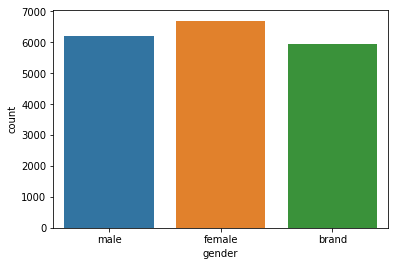

In [12]:
#visual representation of the gender column
sns.countplot(df['gender'], label = 'Gender')


In [13]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    #s = s.replace("co","")
    #s = s.replace("https","")
    #s = s.replace(",","")
    #s = s.replace("[\w*"," ")
    return s

#df['Tweets'] = [cleaning(s) for s in df['text']]
#df['Tweet_Location'] = [cleaning(s) for s in df['tweet_location']]
df['Description'] = [cleaning(s) for s in df['description']]


In [14]:
df.head(5)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,Description
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,i sing my own rhythm
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),i m the author of novels filled with family dr...
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,louis whining and squealing and all
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),mobile guy ers shazam google kleiner perkins y...
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,ricky wilson the best frontman kaiser chiefs t...


In [15]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone,Description
0,815719226,False,finalized,3,10/26/15 23:24,male,1.0000,yes,1.0,12/5/13 1:48,...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/15 12:40,6.587300e+17,main; @Kan1shk3,Chennai,i sing my own rhythm
1,815719227,False,finalized,3,10/26/15 23:30,male,1.0000,yes,1.0,10/1/12 13:51,...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/15 12:40,6.587300e+17,NaN,Eastern Time (US & Canada),i m the author of novels filled with family dr...
2,815719228,False,finalized,3,10/26/15 23:33,male,0.6625,yes,1.0,11/28/14 11:30,...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/15 12:40,6.587300e+17,clcncl,Belgrade,louis whining and squealing and all
3,815719229,False,finalized,3,10/26/15 23:10,male,1.0000,yes,1.0,6/11/09 22:39,...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/15 12:40,6.587300e+17,"Palo Alto, CA",Pacific Time (US & Canada),mobile guy ers shazam google kleiner perkins y...
4,815719230,False,finalized,3,10/27/15 1:15,female,1.0000,yes,1.0,4/16/14 13:23,...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/15 12:40,6.587300e+17,NaN,NaN,ricky wilson the best frontman kaiser chiefs t...


In [16]:
## keep only 100% confidence
print('complete data', df.shape)
print('data with < 100% confidence', df[df['gender:confidence']<1].shape)
drop_index = df[df['gender:confidence']<1].index
df.drop(drop_index , inplace = True)
print(df['gender:confidence'].value_counts())
df.drop(columns = ['gender:confidence'],inplace = True)


complete data (18836, 27)
data with < 100% confidence (5032, 27)
1.0    13804
Name: gender:confidence, dtype: int64


In [17]:
#concating gender and description from the data frame df
df1=pd.concat([df.gender,df.description],axis=1)

In [18]:
df1.head(5)

,gender,description
0,male,i sing my own rhythm.
1,male,I'm the author of novels filled with family dr...
3,male,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,female,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5,female,you don't know me.


In [19]:
# 0-male 1-female
df1.gender = [1 if each =="female" else 0 for each in df1.gender]

In [20]:
df1.head(5)

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5,1,you don't know me.


In [21]:
df1.dtypes

gender          int64
description    object
dtype: object

In [22]:
df1.gender.value_counts()

0    8437
1    5367
Name: gender, dtype: int64

In [23]:
#dropping brand from gender column
df1 = df1.loc[(df['gender']=='female') | (df['gender']=='male')]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 0 to 20049
Data columns (total 2 columns):
gender         10020 non-null int64
description    8766 non-null object
dtypes: int64(1), object(1)
memory usage: 195.7+ KB


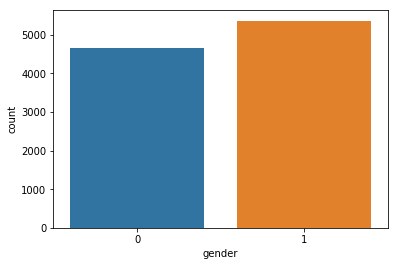

In [24]:
#visual representation of male and female in gender
sns.countplot(df1['gender'], label = 'Gender')

In [25]:
df1.head(5)

,gender,description
0,0,i sing my own rhythm.
1,0,I'm the author of novels filled with family dr...
3,0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe..."
4,1,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...
5,1,you don't know me.


In [26]:
#data cleaning on description
df1['description'] = [cleaning(s) for s in df1['description']]
df1.head(5)

,gender,description
0,0,i sing my own rhythm
1,0,i m the author of novels filled with family dr...
3,0,mobile guy ers shazam google kleiner perkins y...
4,1,ricky wilson the best frontman kaiser chiefs t...
5,1,you don t know me


In [27]:
#assining description_length to description
df1['description_length'] = df1['description'].map(lambda description : len(description))

In [28]:
df1.head(5)

,gender,description,description_length
0,0,i sing my own rhythm,21
1,0,i m the author of novels filled with family dr...,62
3,0,mobile guy ers shazam google kleiner perkins y...,125
4,1,ricky wilson the best frontman kaiser chiefs t...,157
5,1,you don t know me,18


0 is male and 1 is female
Description length by gender


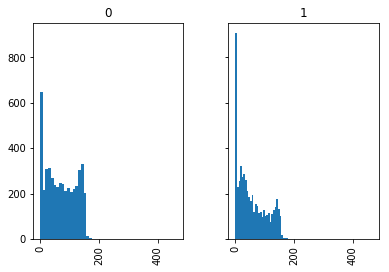

In [29]:
#visual representation of gender with description_length 
df1.hist(column='description_length', by='gender', bins=50, sharex=True, sharey=True)
print('0 is male and 1 is female')
print('Description length by gender')

In [30]:
#Data preprocessing and feature engineering
import nltk
from nltk.corpus import stopwords
import nltk as nlp
description_list=[]

stop = set(stopwords.words('english'))
for d in df1.description:
    d = nltk.word_tokenize(d)    
    d = [word for word in d if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    d = [lemma.lemmatize(word) for word in d]
    d = " ".join(d)
    description_list.append(d)
   

In [31]:
description_list

['sing rhythm',
 'author novel filled family drama romance',
 'mobile guy er shazam google kleiner perkins yahoo sprint pc airtouch air force stanford gsb uva dad husband brother golfer',
 'ricky wilson best frontman kaiser chief best band xxxx thank kaiser chief incredible year gig memory cherish always xxxxxxx',
 'know',
 'secret getting ahead getting started',
 'pll fan crazy mcd ramen bae',
 'renaissance art historian university nottingham fuelled haribo partial coffee soft spot renaissance china national teaching fellow',
 'nan',
 'jmkm ò ü',
 'enthusiastic f fan model collector music fan film fanatic also aspergian',
 'nan',
 'artisan specializing paper mache print making fibre art art teacher cat devotee find page fb http co gbstgicv',
 'bled died take away sin ûê',
 'union j xxxx',
 'start',
 'bsc economics graduate coys',
 'wife coach mom eight troop follower christ',
 'dm closed sc dearmoonshine',
 'award winning author paranormal romance thriller hath fury technology writer 

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
#we can define max_features 
max_features = 1000
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
#count_vectorizer = CountVectorizer(stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(description_list).toarray() # x

print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

1000 most common words: ['academy', 'account', 'act', 'action', 'activist', 'actor', 'actress', 'add', 'addict', 'addicted', 'adult', 'adventure', 'advisor', 'advocate', 'af', 'affair', 'aficionado', 'africa', 'african', 'age', 'agent', 'aint', 'aka', 'al', 'alive', 'alpha', 'alum', 'alumnus', 'amateur', 'amazing', 'ambassador', 'america', 'american', 'analyst', 'angel', 'animal', 'anime', 'anti', 'area', 'arsenal', 'art', 'artist', 'ask', 'aspiring', 'assistant', 'associate', 'atheist', 'athlete', 'attorney', 'au', 'author', 'available', 'average', 'avid', 'award', 'away', 'awesome', 'awkward', 'babe', 'baby', 'bad', 'bae', 'ball', 'band', 'baseball', 'based', 'basically', 'basketball', 'bbc', 'beach', 'bear', 'beat', 'beautiful', 'beauty', 'beer', 'belief', 'believe', 'believer', 'best', 'better', 'bieber', 'big', 'bio', 'bit', 'bitch', 'black', 'blacklivesmatter', 'blessed', 'blog', 'blogger', 'blue', 'board', 'body', 'book', 'booking', 'born', 'boston', 'boxing', 'boy', 'boyfriend'

In [33]:
#splitting the train and test data set

y = df1.iloc[:,0].values   
x = sparce_matrix
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9018, 1000)
(1002, 1000)
(9018,)
(1002,)


In [35]:
#minmax scalar normalization
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

C:\Users\vinit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vinit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [36]:
# guassian NB algorithm
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
nb = GaussianNB()
nb.fit(x_train,y_train)
y_pred = nb.predict(x_test)
y_true = y_test

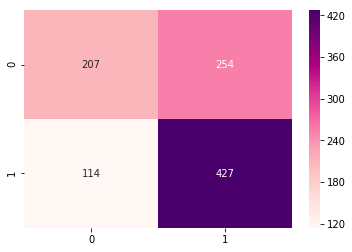

In [37]:
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_true,y_pred)
nBayies_confusion_matrix = sns.heatmap(cm_nb,annot=True,cmap="RdPu",fmt=".0f",cbar=True)
plt.show()
prediction = nb.predict(x_test)
nBayies_confusion_matrix = confusion_matrix(y_test , prediction)

In [38]:
print("Gaussian Navie Bayies accuracy: ",nb.score(x_test,y_test))
nBayies_confusion_matrix = confusion_matrix(y_test , prediction)
print('Confusuon Matrix : \n', nBayies_confusion_matrix)
print('Classification report:\n',classification_report(y_test,prediction))
test_predictions = nb.predict(x_test)
print (test_predictions[:20])

Gaussian Navie Bayies accuracy:  0.6327345309381237
Confusuon Matrix : 
 [[207 254]
 [114 427]]
Classification report:
              precision    recall  f1-score   support

          0       0.64      0.45      0.53       461
          1       0.63      0.79      0.70       541

avg / total       0.64      0.63      0.62      1002

[1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1]


In [39]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

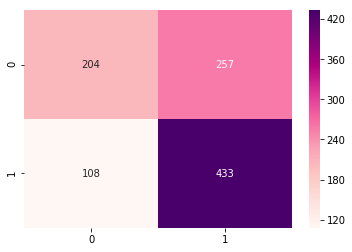

In [40]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
y_true = y_test
cm_nb1 = confusion_matrix(y_true,y_pred)
logistic_confusion_matrix = sns.heatmap(cm_nb1,annot=True,cmap="RdPu",fmt=".0f",cbar=True)
plt.show()


In [41]:
prediction = clf.predict(x_test)
logistic_confusion_matrix = confusion_matrix(y_test , prediction)
print("Logistic Regression accuracy: ",clf.score(x_test,y_test))
print('Confusuon Matrix : \n', logistic_confusion_matrix)
print('Classification report:\n',classification_report(y_test,prediction))
test_predictions = clf.predict(x_test)
print (test_predictions[:20])

Logistic Regression accuracy:  0.6357285429141717
Confusuon Matrix : 
 [[204 257]
 [108 433]]
Classification report:
              precision    recall  f1-score   support

          0       0.65      0.44      0.53       461
          1       0.63      0.80      0.70       541

avg / total       0.64      0.64      0.62      1002

[1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1]


In [42]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

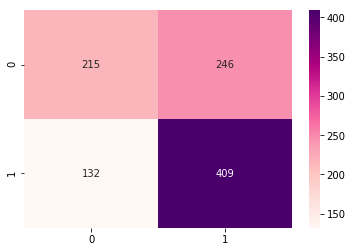

In [43]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
y_true = y_test
cm_nb2 = confusion_matrix(y_true,y_pred)
random_confusion_matrix = sns.heatmap(cm_nb2,annot=True,cmap="RdPu",fmt=".0f",cbar=True)
plt.show()
prediction = rf.predict(x_test)
random_confusion_matrix = confusion_matrix(y_test , prediction)

In [44]:
print("Random Forest accuracy: ",rf.score(x_test,y_test))
print('Confusuon Matrix : \n', random_confusion_matrix)
print('Classification report:\n',classification_report(y_test,prediction))
test_predictions = rf.predict(x_test)
print (test_predictions[:20])

Random Forest accuracy:  0.6227544910179641
Confusuon Matrix : 
 [[215 246]
 [132 409]]
Classification report:
              precision    recall  f1-score   support

          0       0.62      0.47      0.53       461
          1       0.62      0.76      0.68       541

avg / total       0.62      0.62      0.61      1002

[1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1]


In [46]:
# applying assignment 1 data set
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import pos_tag, ne_chunk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer 


stemmer = PorterStemmer()
lem = WordNetLemmatizer()
# read the data set
with open('Mar11_GroupB.txt','r') as f:
    data = f.readlines()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vinit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\vinit\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\vinit\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\vinit\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [47]:
l = []
k = []
for word in data:
    token_words = word_tokenize(word)
    names = token_words[0]
    text = ' '.join(token_words[6:])
    l.append(names)
    k.append(text)
print(l[0])
print(k[0])


moderator
link .


In [48]:
# male female names list
males =' moderator luke ted david matthew jake rick josh tony aaron michael nick george john '
male_name = males.split()
print(male_name)
females = 'judith tia meg vicky eva julie rita leah caroline cintihia ariel macy lynn rebecca cinthia mara amy michelle'
female_names = females.split()
print(female_names)

['moderator', 'luke', 'ted', 'david', 'matthew', 'jake', 'rick', 'josh', 'tony', 'aaron', 'michael', 'nick', 'george', 'john']
['judith', 'tia', 'meg', 'vicky', 'eva', 'julie', 'rita', 'leah', 'caroline', 'cintihia', 'ariel', 'macy', 'lynn', 'rebecca', 'cinthia', 'mara', 'amy', 'michelle']


In [49]:
for x in l:
    print(x)

moderator
meg
aaron
lynn
david
moderator
meg
lynn
aaron
moderator
david
rita
luke
meg
lynn
meg
aaron
moderator
moderator
david
moderator
david
luke
meg
meg
david
david
rita
david
aaron
david
meg
david
aaron
meg
lynn
lynn
rita
david
david
rita
meg
aaron
meg
david
meg
david
aaron
lynn
meg
rita
aaron
david
lynn
aaron
david
lynn
lynn
david
rita
aaron
david
meg
meg
david
david
david
lynn
david
lynn
rita
rita
lynn
rita
lynn
david
aaron
david
meg
aaron
david
david
aaron
aaron
lynn
aaron
meg
david
aaron
meg
aaron
david
rita
lynn
meg
aaron
rita
david
lynn
david
rita
david
lynn
aaron
david
rita
lynn
david
rita
lynn
david
david
aaron
aaron
david
meg
david
david
meg
aaron
meg
rita
lynn
aaron
aaron
meg
aaron
rita
david
david
aaron
lynn
aaron
meg
rita
david
david
meg
meg
meg
rita
lynn
david
aaron
rita
lynn
lynn
meg
david
david
aaron
aaron
rita
lynn
aaron
aaron
david
lynn
lynn
rita
david
david
david
lynn
david
david
aaron
david
meg
david
meg
david
david
david
meg
david
david
david
matthew
matthew
aar

In [50]:
import pandas as pd
df = pd.DataFrame({'names':l, 'text':k , 'gender': ''})
a = []
for i in l:
    for j in male_name:
        if i==j:
            a.append('male')
    for m in female_names:
        if i == m :
            a.append('female')
for v in a:
    print(v)

male
female
male
female
male
male
female
female
male
male
male
female
male
female
female
female
male
male
male
male
male
male
male
female
female
male
male
female
male
male
male
female
male
male
female
female
female
female
male
male
female
female
male
female
male
female
male
male
female
female
female
male
male
female
male
male
female
female
male
female
male
male
female
female
male
male
male
female
male
female
female
female
female
female
female
male
male
male
female
male
male
male
male
male
female
male
female
male
male
female
male
male
female
female
female
male
female
male
female
male
female
male
female
male
male
female
female
male
female
female
male
male
male
male
male
female
male
male
female
male
female
female
female
male
male
female
male
female
male
male
male
female
male
female
female
male
male
female
female
female
female
female
male
male
female
female
female
female
male
male
male
male
female
female
male
male
male
female
female
female
male
male
male
female
male
male
male
male
female
m

In [53]:
import pandas as pd

df2 = pd.DataFrame({'names':l,  'gender':a, 'text':k})
df2

print(df2.head())
print(df2.shape)



       names  gender      text
0  moderator    male    link .
1        meg  female  hi all .
2      aaron    male   hello .
3       lynn  female      hi .
4      david    male      hi .
(479, 3)


In [54]:
df2.gender = [1 if each =="female" else 0 for each in df2.gender]

In [55]:
df2.head(5)

,names,gender,text
0,moderator,0,link .
1,meg,1,hi all .
2,aaron,0,hello .
3,lynn,1,hi .
4,david,0,hi .


In [56]:
import re
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_]', '', s)
    #s = s.replace("co","")
    #s = s.replace("https","")
    #s = s.replace(",","")
    #s = s.replace("[\w*"," ")
    return s

#df['Tweets'] = [cleaning(s) for s in df['text']]
#df['Tweet_Location'] = [cleaning(s) for s in df['tweet_location']]
df['text'] = [cleaning(s) for s in df['text']]


In [57]:
import nltk
from nltk.corpus import stopwords
import nltk as nlp
text_list=[]

stop = set(stopwords.words('english'))
for d in df2.text:
    d = nltk.word_tokenize(d)    
    d = [word for word in d if not word in set(stopwords.words("english"))]
    lemma = nlp.WordNetLemmatizer()
    d = [lemma.lemmatize(word) for word in d]
    d = " ".join(d)
    text_list.append(d)
   

In [58]:
print(text_list)

['link .', 'hi .', 'hello .', 'hi .', 'hi .', 'Hi guy , since four , I think begin others may join later .', 'Ok .', 'ok .', 'ok .', "Let 's see , david , would mind leading today ?", 'okay .', 'hi .', 'hello .', 'hi .', 'hi .', ': ) .', 'hi .', 'Great , thanks ! You guy begin .', 'luke , would mind joining Group A actually .', "'m `` leading `` - take effort - okay , let get started - 'll give shot .", "There 's one person le right , need least four group . : - ) .", "'ve noticed five category divide tax dollar resource .", 'okkk .', 'YEAH .', 'woops .', 'one option make simple , allot even 20 % fund - anyone feel good idea ?', 'think service important others ?', "I 'm librarian ...", "n't shy .", 'thought 20 percent right away .', "'m librarian .", 'I feel like important give thing .', 'guess ; declare biased sense .', 'yeah probably supposed different percentage .', 'water sewer probably need thing .', "n't think , think thing require many resource others .", 'meg said .', 'So ... :

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
#we can define max_features 
max_features = 3000
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
#count_vectorizer = CountVectorizer(stop_words = "english")

sparce_matrix = count_vectorizer.fit_transform(text_list).toarray() # x

print("{} most common words: {}".format(max_features,count_vectorizer.get_feature_names()))

3000 most common words: ['000', '10', '100', '12', '120', '13', '14', '15', '16', '180', '20', '25', '262', '27', '29', '30', '300', '32', '33', '34', '35', '37', '40', '4and', '50', '75', '80', '90', '95', '97', '99', 'aaron', 'aarp', 'able', 'absurd', 'accessible', 'actual', 'actually', 'addition', 'additional', 'addressed', 'adequate', 'affect', 'affluent', 'age', 'aged', 'agency', 'aggressive', 'ago', 'agree', 'agreed', 'agreement', 'agrees', 'aka', 'albany', 'allocate', 'allocation', 'allot', 'alot', 'alright', 'alternate', 'american', 'americans', 'amicable', 'annual', 'annually', 'anybody', 'appealng', 'approach', 'aquafur', 'area', 'arent', 'arithmetic', 'art', 'asia', 'asked', 'aspect', 'assisted', 'award', 'away', 'bag', 'bankrupt', 'based', 'bc', 'begin', 'believe', 'believer', 'benefit', 'benefited', 'best', 'better', 'biased', 'big', 'bigger', 'billion', 'blue', 'book', 'bored', 'bought', 'box', 'break', 'budget', 'build', 'bump', 'bunch', 'bus', 'bye', 'car', 'care', 'cas

In [66]:
#splitting the train and test data set

y = df2['gender']
x = sparce_matrix
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(431, 723)
(48, 723)
(431,)
(48,)


In [68]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.fit_transform(x_test)

C:\Users\vinit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\vinit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

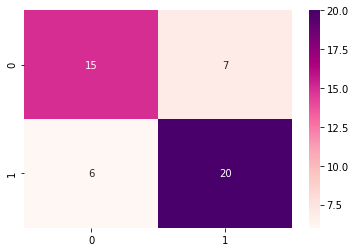

In [70]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(x_test)
y_true = y_test
cm_nb1 = confusion_matrix(y_true,y_pred)
logistic_confusion_matrix = sns.heatmap(cm_nb1,annot=True,cmap="RdPu",fmt=".0f",cbar=True)
plt.show()


In [71]:
prediction = clf.predict(x_test)
logistic_confusion_matrix = confusion_matrix(y_test , prediction)
print("Logistic Regression accuracy: ",clf.score(x_test,y_test))
print('Confusuon Matrix : \n', logistic_confusion_matrix)
print('Classification report:\n',classification_report(y_test,prediction))
test_predictions = clf.predict(x_test)
print (test_predictions[:20])

Logistic Regression accuracy:  0.7291666666666666
Confusuon Matrix : 
 [[15  7]
 [ 6 20]]
Classification report:
              precision    recall  f1-score   support

          0       0.71      0.68      0.70        22
          1       0.74      0.77      0.75        26

avg / total       0.73      0.73      0.73        48

[1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1]
